# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, optimize
from scipy import stats
from scipy.stats import norm

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv') # read files
df.head()  #file has 3 columns of data


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Your work here.

In [2]:
len(df)  #there are 130 records in this dataframe

130

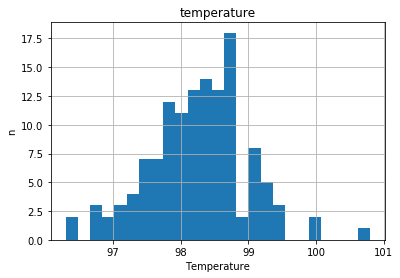

In [121]:
temp = df.temperature
df.hist('temperature', bins=25) # histogram of temperature data
plt.ylabel('n')
plt.xlabel('Temperature')

In [62]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [69]:
x = stats.mstats.normaltest(df['temperature'], axis=0)   # test for normality 
x

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# Question 1.  Is the distribution of body temperatures normal?

Visual inspection of the histogram of the temperature data showed that the distribution looks normal with the mean at around 98.25 degree F, although skewed a little toward the left.  Normality test with a pvalue of 0.25 showed the distribution is in fact normal.

# Question 2. Is the sample size large? Are the observations independent?

With an n of 130, the sample size is considered large.  The observations are independent. This satisfy the conditions for CLT.

Z test 

In [87]:
x_bar = df.temperature.mean()  # get mean of temperature data
x_std = df.temperature.std()  # get standard deviation from temperature data
n = df.temperature.count()   # get number of observations

In [90]:
z_stat = (x_bar-98.6)/(x_std/(n**0.5)) # get z statistic from the data
z_stat

-5.4548232923640789

In [96]:
p_values = stats.norm.sf(abs(z_stat))*2 # get the pvalue for two-sided z test
p_values

4.9021570141133797e-08

# Question 3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?  I would use a one-sample test.  Because we are testing only one metric, we are not testing before or after treatment.
Since the sample size is above 30, I would use a Z test.  Using a z test to test if the mean of population is 98.6, the p value is 4.9X10^8.  This shows it is extrememly unlikely that the true population mean is actually 98.6 degree F.


Now try using the other test. How is the result be different? Why?
Using a ttest, the pvalue is 2.4X10^7 to test if the mean is actually 98.6.  This is the same conclusion as the z test.  The population mean is unlikely to be 98.6.

In [4]:
y = stats.ttest_1samp(df['temperature'], 98.6)
y

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [103]:
margin_error = (x_std/n**0.5)*2
margin_error

0.12860883367578202

In [117]:
#import numpy as np, scipy.stats as st

st.t.interval(0.95, len(temp)-1, loc=np.mean(temp), scale=st.sem(temp))

(98.122002905608042, 98.376458632853513)

# At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

The margin of error is 0.128 and the confidence interval for the mean of population temperature is 98.122 to 98.377.

In [42]:
df = df[['gender','temperature','heart_rate']] 
df.head()

,gender,temperature,heart_rate
0,F,99.3,68.0
1,F,98.4,81.0
2,M,97.8,73.0
3,F,99.2,66.0
4,F,98.0,73.0


In [106]:
gendered = df.groupby(['gender']).describe()

gendered


heart_rate  temperature
gender                               
F      count   65.000000    65.000000
       mean    74.153846    98.393846
       std      8.105227     0.743488
       min     57.000000    96.400000
       25%     68.000000    98.000000
       50%     76.000000    98.400000
       75%     80.000000    98.800000
       max     89.000000   100.800000
M      count   65.000000    65.000000
       mean    73.369231    98.104615
       std      5.875184     0.698756
       min     58.000000    96.300000
       25%     70.000000    97.600000
       50%     73.000000    98.100000
       75%     78.000000    98.600000
       max     86.000000    99.500000

In [115]:
gender_stat  = stats.ttest_ind(temp[df.gender=='F'], temp[df.gender=='M'])
gender_stat

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

# Question 5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.


Using a ttest to compare the mean of male and the mean of female,  there is only a 2/100 chance that the temperature is the same between males and females.  

gender
F    [[Axes(0.125,0.125;0.775x0.755)]]
M    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

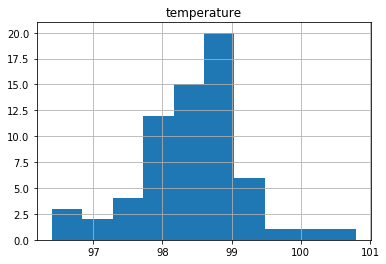

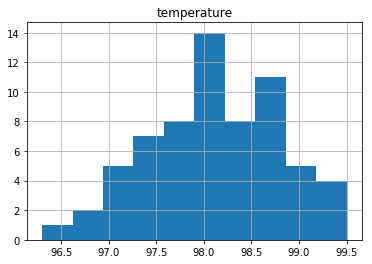

In [124]:
df.groupby(['gender']).hist('temperature', bins=10)
